In [1]:
# Common imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import warnings

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

In [3]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
  1/363 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - loss: 5.8624

c:\Users\omarc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 1.3957 - val_loss: 8.9999
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.5086 - val_loss: 0.4108
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.4314 - val_loss: 0.3841
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.4061 - val_loss: 0.3814
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.4051 - val_loss: 0.3638
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.3856 - val_loss: 0.3600
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.3655 - val_loss: 0.3517
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.3767 - val_loss: 0.3495
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.3671 - val_loss: 0.3434
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.3852 - val_loss: 0.3420
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.3766 - val_loss: 0.3453
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

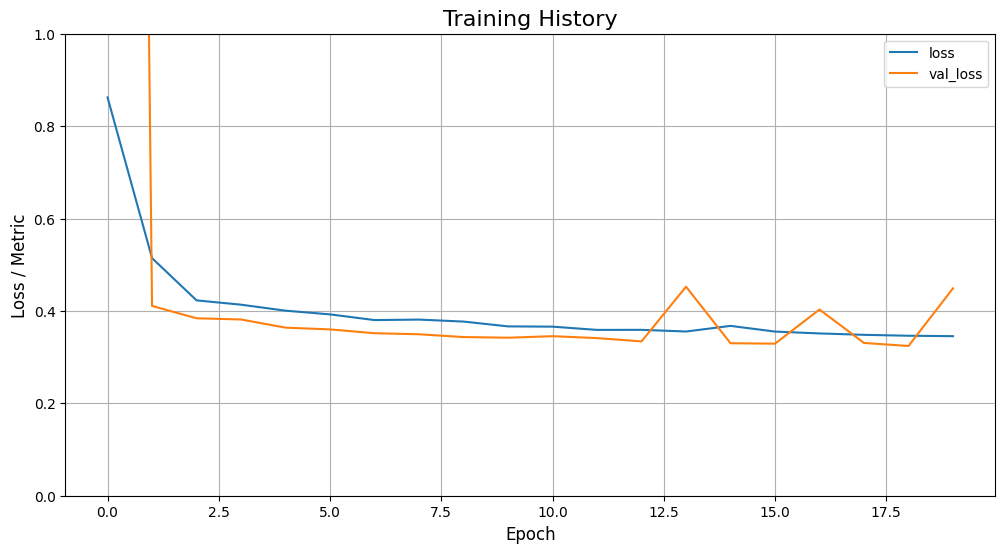

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))  # 👈 Increase the figure size
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # Keep Y-axis limits if needed
plt.title("Training History", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss / Metric", fontsize=12)
plt.legend(pd.DataFrame(history.history).columns, fontsize=10)
plt.show()


In [6]:
y_pred = model.predict(X_valid)
print("Sample prediction:", y_pred[:5].flatten())
print("Actual values:", y_valid[:5])


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step
Sample prediction: [1.3112286 1.6096884 2.0335903 2.3043678 2.792758 ]
Actual values: [1.625 2.25  1.568 2.124 2.573]


In [7]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])

In [8]:
def print_data_split_proportions(X_train, X_valid, X_test):
    total = len(X_train) + len(X_valid) + len(X_test)
    
    print("📊 Data Split Proportions (based on number of samples):")
    print(f"  - Training    : {len(X_train):5d} samples ({len(X_train)/total:.2%})")
    print(f"  - Validation  : {len(X_valid):5d} samples ({len(X_valid)/total:.2%})")
    print(f"  - Test        : {len(X_test):5d} samples ({len(X_test)/total:.2%})")

print_data_split_proportions(X_train, X_valid, X_test)

📊 Data Split Proportions (based on number of samples):
  - Training    : 11610 samples (56.25%)
  - Validation  :  3870 samples (18.75%)
  - Test        :  5160 samples (25.00%)


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_metrics(model, X, y, dataset_name="Test"):
    y_pred = model.predict(X).flatten()
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"📊 {dataset_name} Set Evaluation")
    print(f"  - MSE : {mse:.4f}")
    print(f"  - MAE : {mae:.4f}")
    print(f"  - R²  : {r2:.4f}")
    
    return mse, mae, r2

In [10]:
evaluate_metrics(model, X_valid, y_valid, dataset_name="Validation")
evaluate_metrics(model, X_test, y_test, dataset_name="Test")

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
📊 Validation Set Evaluation
  - MSE : 0.4489
  - MAE : 0.4115
  - R²  : 0.6586
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step
📊 Test Set Evaluation
  - MSE : 0.3590
  - MAE : 0.4147
  - R²  : 0.7287


(0.35899837359223846, 0.41472310796754674, 0.7286929703733078)

In [11]:
import keras_tuner as kt
from tensorflow import keras

### Defining a HyperModel


#### V1 - Basic HyperModel
# def build_tuned_model(hp):
#     input = keras.layers.Input(shape=(8,))
    
#     # Tune number of hidden layers (1 to 3)
#     x = input
#     for i in range(hp.Int("num_layers", 1, 3)):
#         units = hp.Int(f"units_{i}", min_value=16, max_value=128, step=16)
#         x = keras.layers.Dense(units, activation="relu")(x)
        
#         # Optional: Tune dropout
#         if hp.Boolean("use_dropout"):
#             x = keras.layers.Dropout(rate=hp.Float("dropout_rate", 0.1, 0.5, step=0.1))(x)
    
#     # Concatenate with original input (like the original model)
#     concat = keras.layers.Concatenate()([input, x])
#     output = keras.layers.Dense(1)(concat)

#     model = keras.Model(inputs=input, outputs=output)
    
#     # Tune learning rate
#     lr = hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
#                   loss="mse", metrics=["mae"])
#     return model


#### V2 - Advanced HyperModel with Keras Tuner
def build_tuned_model(hp):
    input = keras.layers.Input(shape=(8,))
    
    # Tune number of hidden layers (1 to 3)
    x = input
    for i in range(hp.Int("num_layers", 1, 3)):
        units = hp.Int(f"units_{i}", min_value=16, max_value=128, step=16)
        x = keras.layers.Dense(units, activation="relu")(x)
        
        # Optional: Tune dropout
        if hp.Boolean("use_dropout"):
            x = keras.layers.Dropout(rate=hp.Float("dropout_rate", 0.1, 0.5, step=0.1))(x)
    
    # Concatenate with original input
    concat = keras.layers.Concatenate()([input, x])
    output = keras.layers.Dense(1)(concat)

    model = keras.Model(inputs=input, outputs=output)
    
    # Tune optimizer and learning rate
    optimizer = hp.Choice("optimizer", ["adam", "rmsprop", "sgd"])
    lr = hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])
    if optimizer == "adam":
        opt = keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "rmsprop":
        opt = keras.optimizers.RMSprop(learning_rate=lr)
    else:
        opt = keras.optimizers.SGD(learning_rate=lr)
    
    model.compile(optimizer=opt, loss="mse", metrics=["mae"])
    return model


In [12]:
### Initializing and running the tuner
tuner = kt.RandomSearch(
    build_tuned_model,
    objective="val_mae",  # Minimize validation MAE
    max_trials=10,        # Number of different models to try
    executions_per_trial=1,
    directory="kt_dir",
    project_name="california_housing"
)

Reloading Tuner from kt_dir\california_housing\tuner0.json


In [13]:
#### V1 - Basic HyperModel
# tuner.search(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), verbose=1)


#### V2 - Advanced HyperModel with Keras Tuner
# Tune batch size and epochs
tuner.search(
    X_train, y_train,
    epochs=30,  # Set a fixed range of epochs for the search
    batch_size=32,  # Set a fixed batch size for the search
    validation_data=(X_valid, y_valid),
    verbose=1
)

# Model Evaluation - Best Performing Model

In [14]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\omarc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [15]:
# Evaluate the best model on the test set
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.2637 - mae: 0.3578
Test Loss: 0.2683
Test MAE: 0.3582


In [16]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Display some predictions and actual values
print("Sample Predictions:", y_pred[:5].flatten())
print("Actual Values:", y_test[:5])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
Sample Predictions: [0.407771  0.9743499 5.3799977 2.6053739 2.6479592]
Actual Values: [0.477   0.458   5.00001 2.186   2.78   ]


In [17]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps.values)

Best Hyperparameters:
{'num_layers': 3, 'units_0': 80, 'use_dropout': False, 'learning_rate': 0.001, 'units_1': 64, 'units_2': 112, 'dropout_rate': 0.4, 'optimizer': 'adam'}


Epoch 1/30


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - loss: 0.2418 - mae: 0.3375 - val_loss: 0.4251 - val_mae: 0.3473
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 0.2382 - mae: 0.3350 - val_loss: 0.3636 - val_mae: 0.3527
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.2362 - mae: 0.3331 - val_loss: 0.8792 - val_mae: 0.3739
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.2338 - mae: 0.3337 - val_loss: 0.4357 - val_mae: 0.3635
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.2303 - mae: 0.3327 - val_loss: 0.5984 - val_mae: 0.3536
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.2292 - mae: 0.3300 - val_loss: 0.3568 - val_mae: 0.3529
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 0.2247 - mae: 0.3285 - val_loss: 0.4954 - val_mae: 0.3794
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.2276 - mae: 0.3318 - val_loss: 0.2629 - val_mae: 0.3441
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/st

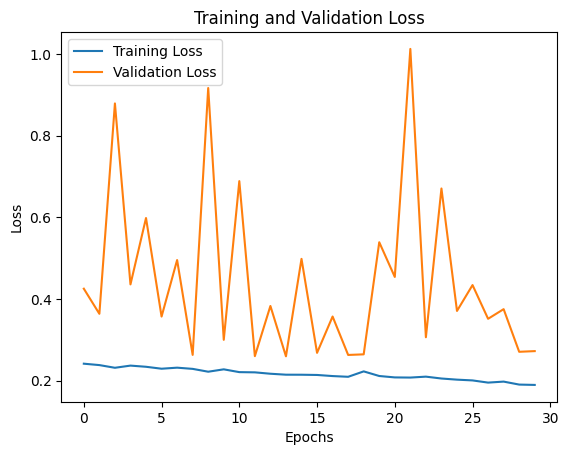

In [19]:
# Re-train the best model to capture the training history
history = best_model.fit(
    X_train, y_train,
    epochs=30,  # Use the same number of epochs as in the tuning process
    validation_data=(X_valid, y_valid),
    batch_size=32,  # Use the same batch size as in the tuning process
    verbose=1
)

# Plot the training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()